# Загрузка Pandas и очистка данных

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

In [2]:
RANDOM_SEED = 42

In [17]:
df = pd.read_csv('main_task.xls')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [4]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [7]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

#Сохраним данные о наличии пропусков в отдельные признаки и заполним их
df['cuisine_style_isNAN'] = pd.isna(df['Cuisine Style']).astype('uint8')
df['number_of_reviews_isNAN'] = pd.isna(df['Number of Reviews']).astype('uint8')

df['Cuisine Style']=df['Cuisine Style'].fillna("")
df = df.fillna(0)

In [8]:
#URL_TA','ID_TA', 'Reviews -удалим из-за малой информативности их
df=df.drop(columns=['URL_TA','ID_TA', 'Reviews'])
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,cuisine_style_isNAN,number_of_reviews_isNAN
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,0,0
1,id_1535,Stockholm,,1537.0,4.0,0,10.0,0,0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,0,0
3,id_3456,Berlin,,3458.0,5.0,0,3.0,0,0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,0,0


In [9]:
#Заменим средним значением рейтинга по городу
def calc_mean_score(row):
    return df[df['City']==row['City']]['Rating'].mean()

In [10]:
df['city_mean']=df.apply(calc_mean_score, axis=1)

In [11]:
#Разобьем Price Range на столбцы low_price для $, mid_price для $$-$$$, high_price для $$$$
df['Price Range'].value_counts()
df.head()

df=pd.get_dummies(df, columns=['Price Range'])
df.columns=['Restaurant_id','city', 'cuisine_style','ranking','Rating', 'review_numbers', 'cuisine_style_isNAN', 'number_of_reviews_isNAN', 'city_mean','low_price','mid_price','high_price','no_price']
df

,Restaurant_id,city,cuisine_style,ranking,Rating,review_numbers,cuisine_style_isNAN,number_of_reviews_isNAN,city_mean,low_price,mid_price,high_price,no_price
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,194.0,0,0,3.942414,0,0,1,0
1,id_1535,Stockholm,,1537.0,4.0,10.0,0,0,3.870122,1,0,0,0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,688.0,0,0,3.955098,0,0,0,1
3,id_3456,Berlin,,3458.0,5.0,3.0,0,0,4.124594,1,0,0,0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,84.0,0,0,4.047032,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,79.0,0,0,3.824895,0,0,1,0
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,542.0,0,0,3.942414,0,0,1,0
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,4.0,0,0,3.870122,1,0,0,0
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,70.0,0,0,4.089409,0,0,1,0


In [12]:
#cuisine_style - столбец со списком предлагаемых в ресторане видов кухни. Посчитаем сколько видов кухонь предлагается в каждом из ресторанов
df.cuisine_style.value_counts().head(30)

                                                                   9283
['Italian']                                                        1032
['French']                                                          805
['Spanish']                                                         695
['French', 'European']                                              405
['Cafe']                                                            403
['Pizza']                                                           371
['Italian', 'Pizza']                                                343
['European', 'Portuguese']                                          342
['Chinese']                                                         328
['Mediterranean']                                                   256
['Bar', 'Pub']                                                      255
['Mediterranean', 'Spanish']                                        236
['Indian']                                                      

In [34]:

print('Как выглядят данные в столбце:', df['Restaurant_id'][0])
print()
print('Какой тип данных:', df['Restaurant_id'].dtypes)
print()
print('Количество пропусков в столбце:', df['Restaurant_id'].isna().sum())

Как выглядят данные в столбце: id_5569

Какой тип данных: object

Количество пропусков в столбце: 0


In [36]:
df.Restaurant_id.describe()
# по условию - в одному id  могут быть прикреплены несколько ресторанов одной сети,
# поэтому уникальных значений меньше чем записей

count      40000
unique     11909
top       id_227
freq          18
Name: Restaurant_id, dtype: object

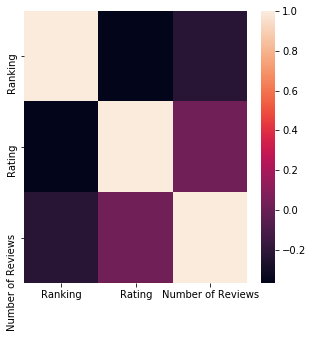

In [39]:
#Cильнокоррелирующих столбцов нет, поэтому можно оставить все
sns.heatmap(df.corr())

In [40]:

df.Restaurant_id = [i[3:] for i in df.Restaurant_id]
df.Restaurant_id = [int(i) for i in df.Restaurant_id]

In [41]:
# преобразование столбца в численное выражение
print(len(df.Restaurant_id))
print(type(df.Restaurant_id[1]))


40000
<class 'numpy.int64'>


In [42]:
df.head(3)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


MAE: 0.4869289490904786


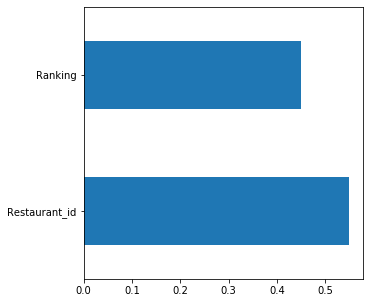

In [78]:
model(df[['Restaurant_id', 'Ranking','Rating']])

In [71]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [72]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


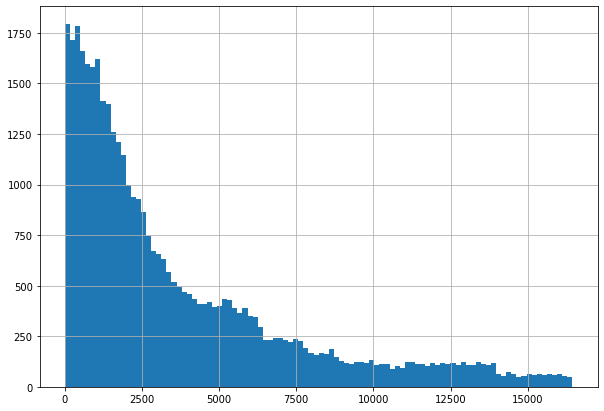

In [74]:
plt.rcParams['figure.figsize'] = (10,7)
df['Ranking'].hist(bins=100)

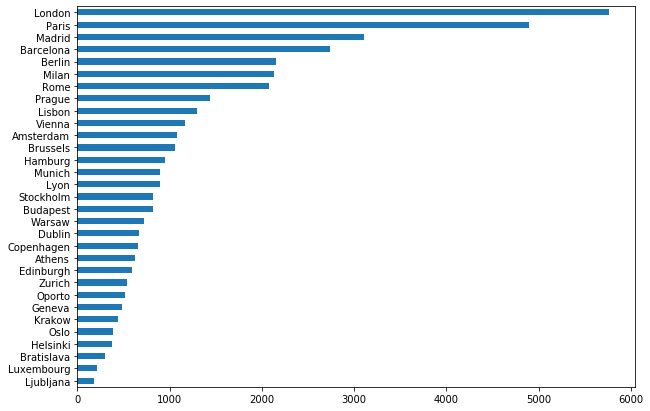

In [75]:
df['City'].value_counts(ascending=True).plot(kind='barh')

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [ ]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Restaurant_id', 'Rating'], axis = 1)
y = df['Rating']

In [ ]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [ ]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [46]:
test_data = df.drop(['Rating','Restaurant_id'], axis=1)

In [47]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [49]:
print('Как выглядят данные в столбце:', df['Cuisine Style'][0])
print()
print('Какой тип данных:', df['Cuisine Style'].dtypes)
print()
print('Количество пропусков в столбце:', df['Cuisine Style'].isna().sum())

Как выглядят данные в столбце: ['European', 'French', 'International']

Какой тип данных: object

Количество пропусков в столбце: 9283


In [50]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [51]:
df['Cuisine Style'].value_counts()

['Italian']                                                                                1032
['French']                                                                                  805
['Spanish']                                                                                 695
['French', 'European']                                                                      405
['Cafe']                                                                                    403
                                                                                           ... 
['Spanish', 'Delicatessen', 'Grill']                                                          1
['Lebanese', 'Middle Eastern', 'Vegetarian Friendly', 'Halal']                                1
['Italian', 'Mediterranean', 'Barbecue', 'European', 'Vegetarian Friendly']                   1
['Pub', 'Gastropub', 'Steakhouse', 'Bar', 'Barbecue', 'British', 'Gluten Free Options']       1
['Fast Food', 'Asian', 'Vietnamese', 'So

# Создаём, обучаем и тестируем модель

In [30]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [99]:
#создем модель
def model(df):
    y = df.Rating.values # наш таргет
    X = df.drop(['Rating'], axis=1)
    
    # Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
    # выделим 10% данных на валидацию (параметр test_size)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=RANDOM_SEED)
    
    # Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
    model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)
    
    # Обучаем модель на тестовом наборе данных
    model.fit(X_train, y_train)
    
    # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
    # Предсказанные значения записываем в переменную y_pred
    y_pred = model.predict(X_test)
    
    # Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
    # Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    
    # в RandomForestRegressor есть возможность вывести самые важные признаки для модели
    plt.rcParams['figure.figsize'] = (5,5)
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(15).plot(kind='barh')
    plt.show()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


MAE: 0.502575104714453


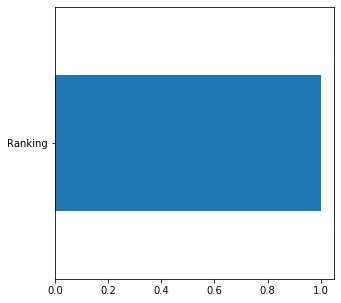

In [100]:
model(df[['Ranking','Rating']])